# Preconsolidation pressure / Yield stress

© 2023 Daniel F. Ruiz, Exneyder A. Montoya-Araque y Universidad EAFIT.

This notebook relies on [`pySigmaP`](https://pysigmap.readthedocs.io/en/latest/) developed by [Montoya-Araque et al., (2022)](https://doi.org/10.1016/j.softx.2022.100990).

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_mechanics/blob/main/notebooks/preconsol_pressure.ipynb).


## Required modules and global setup for plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    run('pip install ipympl', shell=True);
    run('pip install pysigmap', shell=True);
    from google.colab import output, files
    output.enable_custom_widget_manager()
else:
    import tkinter as tk
    from tkinter.filedialog import askopenfilename

from pysigmap.data import Data
from pysigmap.energy import WangAndFrost
from pysigmap.energy import BeckerEtAl
from pysigmap.bilog import Bilog
from pysigmap.boone import Boone
from pysigmap.pachecosilva import PachecoSilva
from pysigmap.casagrande import Casagrande

from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-widgets.widget-label {display: none;} </style>'


## Block 1: Input loading data from an external file

### Load external file

In [2]:
file_number = 0  # Select `0` for demostrative exampe or one of (1, 2, 3) depending on the input file


In [3]:
if file_number > 0:
    if 'google.colab' in str(get_ipython()):
        file = files.upload()
        for key, val in file.items():
            open(key,'wb').write(val)
        df = pd.read_excel(key)
    else:
        tk.Tk().withdraw()
        df = pd.read_excel(askopenfilename())
else:
    url = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pysigmap/testData.csv"
    df = pd.read_csv(url)

df


,Effective_Vertical_Stress,Axial_Strain,Void_Ratio
0,0.00,0.0000,0.775190
1,6.18,0.8700,0.759745
2,12.36,1.6000,0.746786
3,24.81,2.5200,0.730455
4,49.52,3.7200,0.709152
5,99.05,5.1000,0.684655
6,198.19,6.6925,0.656385
7,396.38,8.9200,0.616843
8,792.77,11.3400,0.573883
9,1585.43,14.7825,0.512772


/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


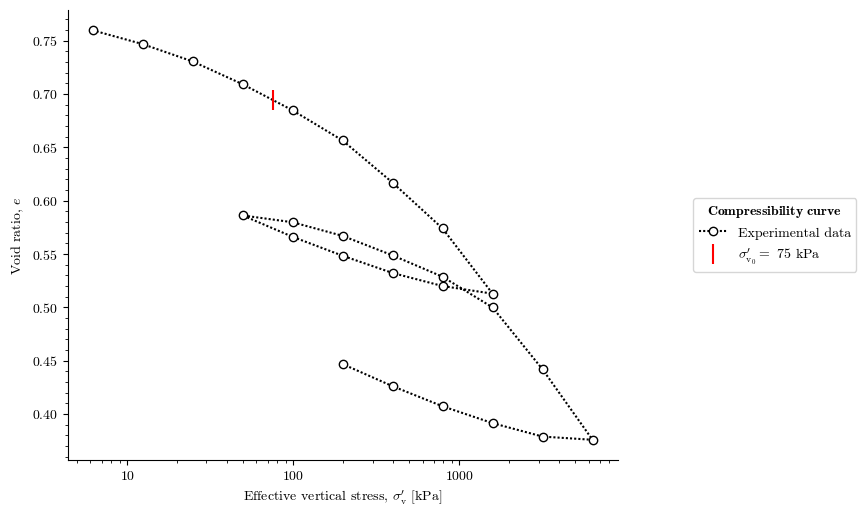

In [4]:
if file_number == 0:
    data = Data(df, sigmaV=75, strainPercent=True, reloading=True, secondUnloading=True)
elif file_number == 1:
    # df = pd.read_excel('data/sigmacrítico1_input.xlsx')
    df.loc[6, "s'_(kPa)"] = df.loc[14, "s'_(kPa)"]
    data = Data(df, sigmaV=27, strainPercent=True, reloading=True, secondUnloading=False)
elif file_number == 2:
    # df = pd.read_excel('data/sigmacrítico2_input.xlsx')
    data = Data(df, sigmaV=50, strainPercent=True, reloading=False, secondUnloading=False)
elif file_number == 3:
    # df = pd.read_excel('data/sigmacrítico3_input.xlsx')
    data = Data(df, sigmaV=50, strainPercent=True, reloading=True, secondUnloading=True)

fig = data.plot()
display(fig)


## Block 2: $C_\mathrm{c}$ and $C_\mathrm{r}$

### 2.1 - Default parameters: $C_\mathrm{c}$ (maximum slope) – $C_\mathrm{r}$ (opt=1)

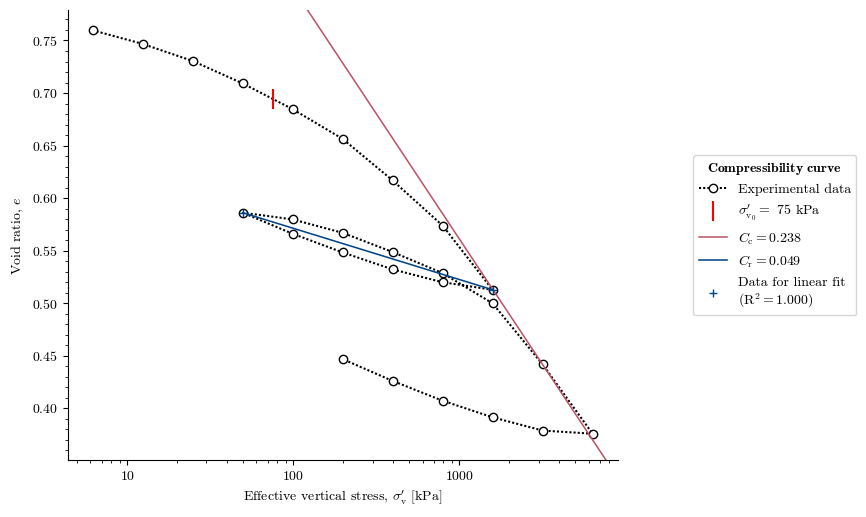

In [5]:
data.compressionIdx(range2fitCc=None)
data.recompressionIdx(opt=1)
fig = data.plot()
display(fig)


### 2.2: $C_\mathrm{c}$ (points defined by a range in $\sigma'_\mathrm{v}$) – $C_\mathrm{r}$ (opt=2)

`opt=3` for calculating $C_\mathrm{r}$ only works if there is a reloading stage

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/ipympl/backend_nbagg.py:279: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  self.manager.handle_json(content)


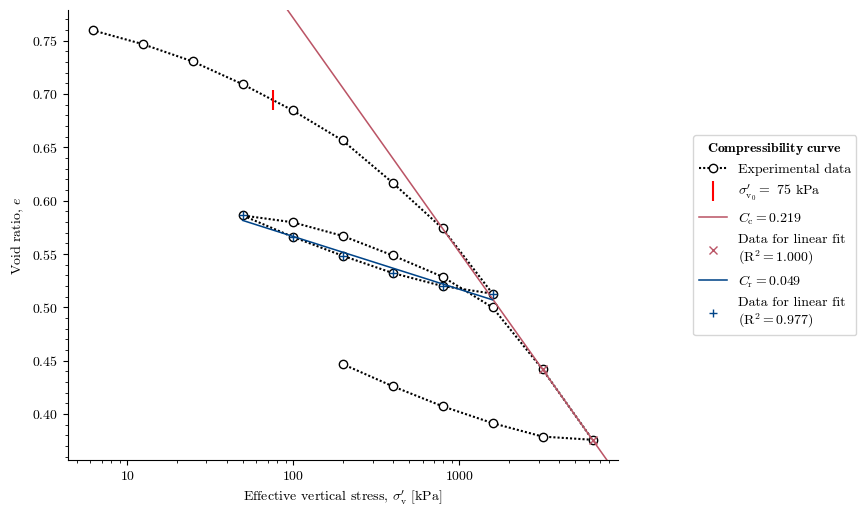

In [6]:
if file_number == 0:
    data.compressionIdx(range2fitCc=(3000, 8000))
elif file_number == 1:
    data.compressionIdx(range2fitCc=(70, 150))
elif file_number == 2:
    data.compressionIdx(range2fitCc=(180, 800))
elif file_number == 3:
    data.compressionIdx(range2fitCc=(300, np.inf))

data.recompressionIdx(opt=2)
fig = data.plot()
display(fig)


## Block 3: Computation of $\sigma_{\mathrm{p}}$  via the Casagrande method

In [7]:
m_casagrande = Casagrande(data)


### 3.1: Default parameters: cubic spline function

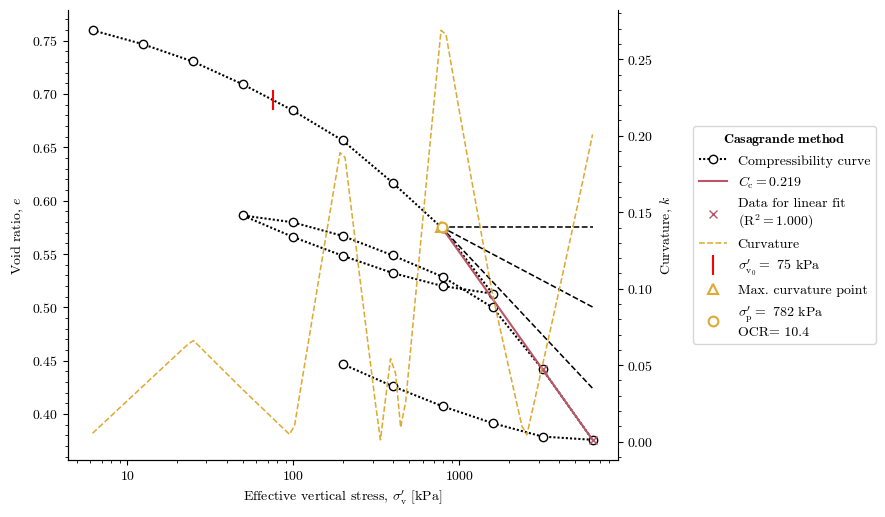

In [8]:
if file_number == 0:
    fig = m_casagrande.getSigmaP()
elif file_number == 1:
    # fig = None  # This method is not suitable for this data set
    fig = m_casagrande.getSigmaP(mcp=None, range2fitCS=[00, 70], loglog=True)
elif file_number == 2: # This method is not suitable for this data set
    fig = m_casagrande.getSigmaP(mcp=None, range2fitCS=[50, 250], loglog=True)
elif file_number == 3:
    fig = m_casagrande.getSigmaP(mcp=None, range2fitCS=None, loglog=False)

display(fig)


### 3.2: Fourth order polynomial (FOP)

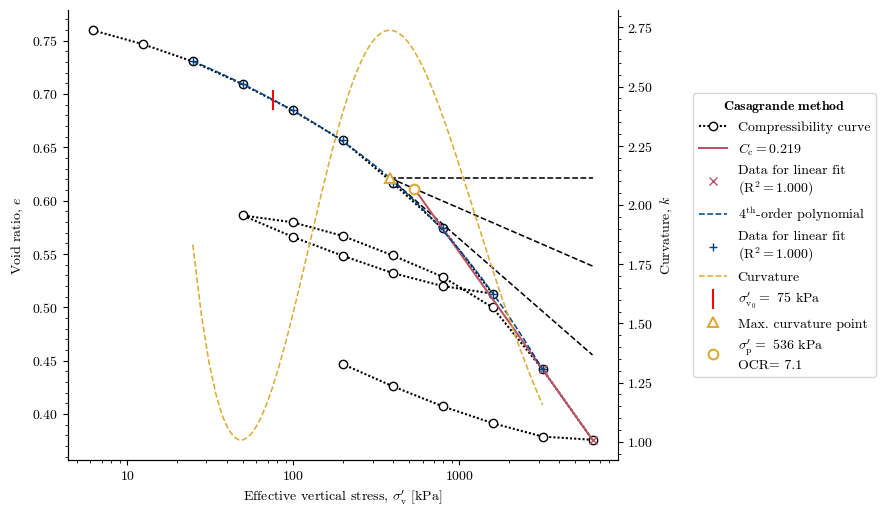

In [9]:
if file_number == 0:
    fig = m_casagrande.getSigmaP(range2fitFOP=[20, 5000], loglog=True)
elif file_number == 1:  # This method is not suitable for this data set
    fig = m_casagrande.getSigmaP(range2fitFOP=[10, 100],  loglog=True)
elif file_number == 2: # This method is not suitable for this data set
    fig = m_casagrande.getSigmaP(range2fitFOP=[50, 250], loglog=True)
elif file_number == 3:
    fig = m_casagrande.getSigmaP(range2fitFOP=[10, 500], loglog=True)

display(fig)


### 3.3: MCP manually introduced

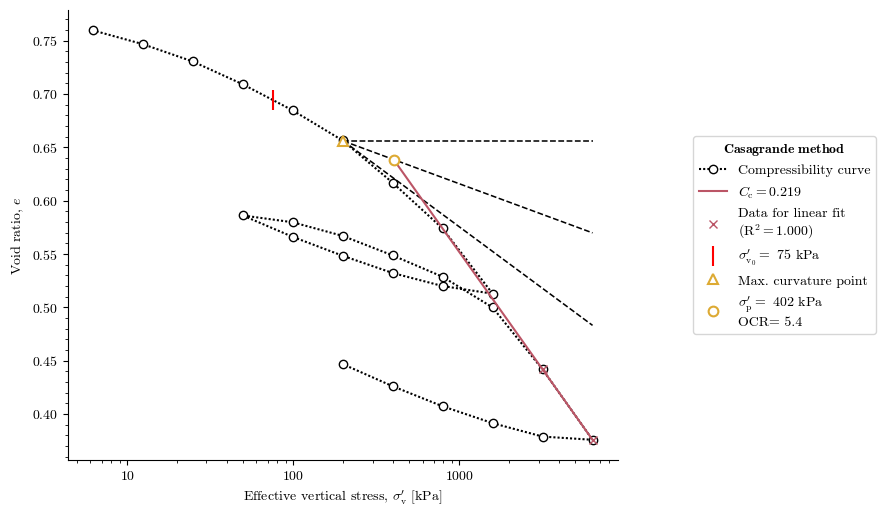

In [10]:
if file_number == 0:
    fig = m_casagrande.getSigmaP(mcp=200)
elif file_number == 1:
    fig = m_casagrande.getSigmaP(mcp=30)
elif file_number == 2:
    fig = m_casagrande.getSigmaP(mcp=70)
elif file_number == 3:
    fig = m_casagrande.getSigmaP(mcp=70)

display(fig)


## Block 4: Computation of $\sigma_{\mathrm{p}}$  via the Pacheco Silva and Boone methods

### 4.1: Pacheco Silva method

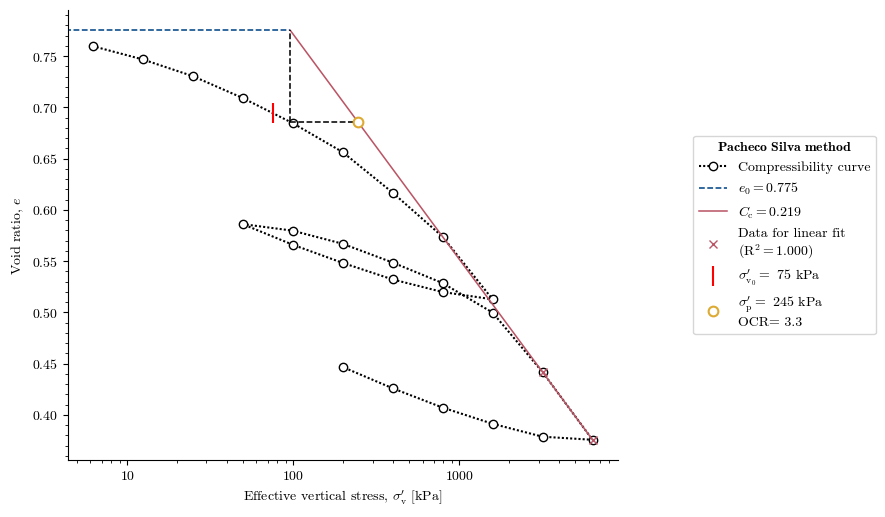

In [11]:
m_pachecosilva = PachecoSilva(data)
fig = m_pachecosilva.getSigmaP()
display(fig)


### 4.2: Boone method

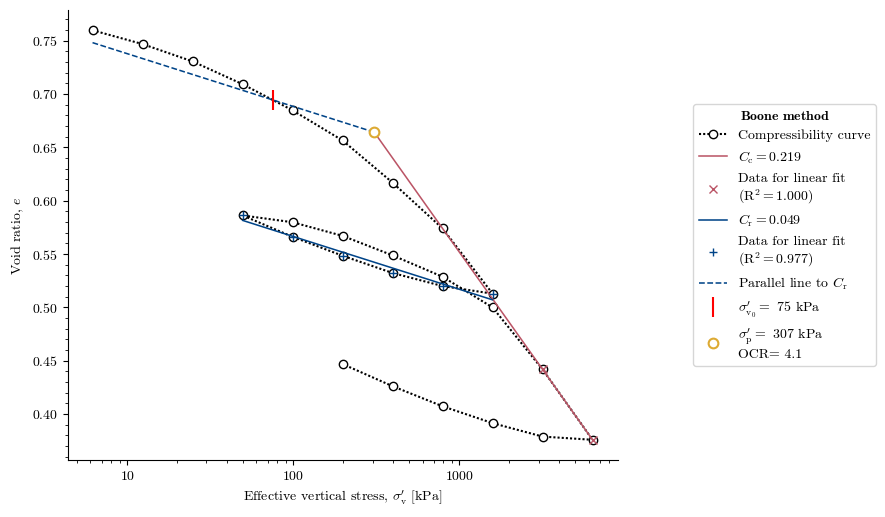

In [12]:
m_boone = Boone(data)
fig = m_boone.getSigmaP()
display(fig)


## Block 5: Computation of $\sigma_{\mathrm{p}}$  via the bilogarithmic methods

In [13]:
m_bilog = Bilog(data)


### 5.1: Butterfield method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


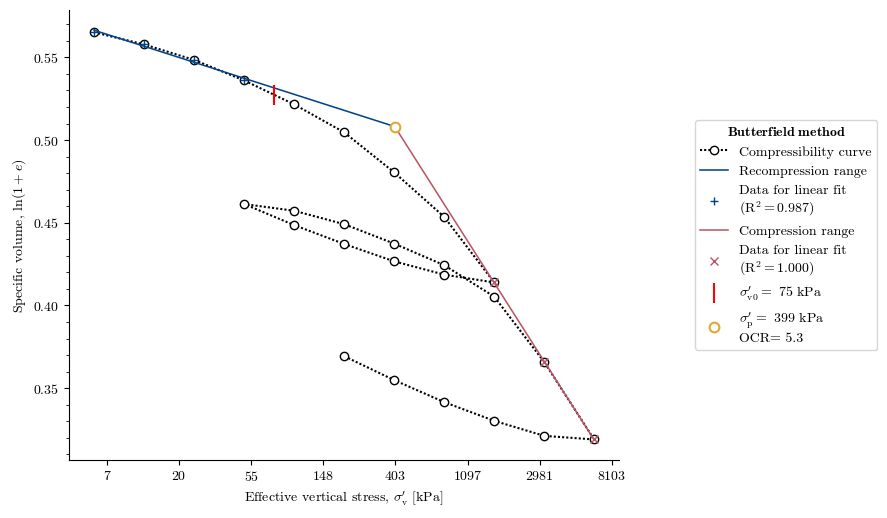

In [14]:
if file_number == 0:
    fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[1000, np.inf], opt=1)
elif file_number == 1:
    fig = m_bilog.getSigmaP(range2fitRR=[0, 30], range2fitCR=[100, np.inf], opt=1)
elif file_number == 2:
    fig = m_bilog.getSigmaP(range2fitRR=[0, 100], range2fitCR=[200, np.inf], opt=1)
elif file_number == 3:
    fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[300, np.inf], opt=1)

display(fig)


### 5.2: Oikawa method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/ipympl/backend_nbagg.py:279: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  self.manager.handle_json(content)


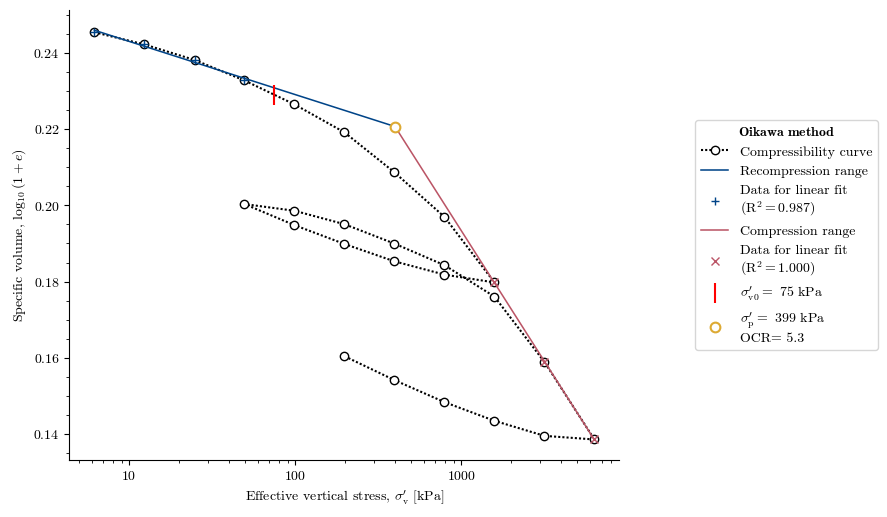

In [15]:
if file_number == 0:
    fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[1000, np.inf], opt=2)
elif file_number == 1:
    fig = m_bilog.getSigmaP(range2fitRR=[0, 30], range2fitCR=[100, np.inf], opt=2)
elif file_number == 2:
    fig = m_bilog.getSigmaP(range2fitRR=[0, 100], range2fitCR=[200, np.inf], opt=2)
elif file_number == 3:
    fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[300, np.inf], opt=2)

display(fig)


### 5.3: Onitsuka et al. method

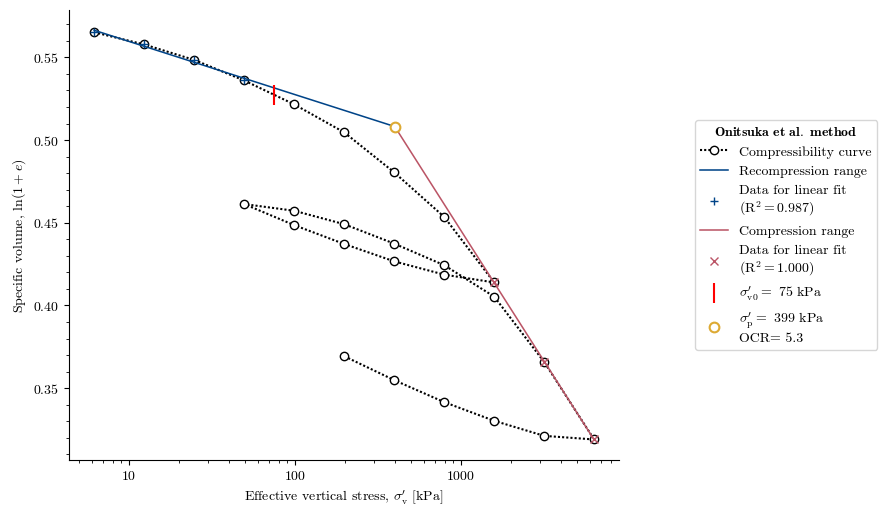

In [16]:
if file_number == 0:
    fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[1000, np.inf], opt=3)
elif file_number == 1:
    fig = m_bilog.getSigmaP(range2fitRR=[0, 35], range2fitCR=[100, np.inf], opt=3)
elif file_number == 2:
    fig = m_bilog.getSigmaP(range2fitRR=[0, 100], range2fitCR=[200, np.inf], opt=3)
elif file_number == 3:
    fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[200, np.inf], opt=3)

display(fig)


## Block 6: Computation of $\sigma_{\mathrm{p}}$ via the strain energy methods

In [17]:
m_becker = BeckerEtAl(data)


### 6.1: Becker et al. method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


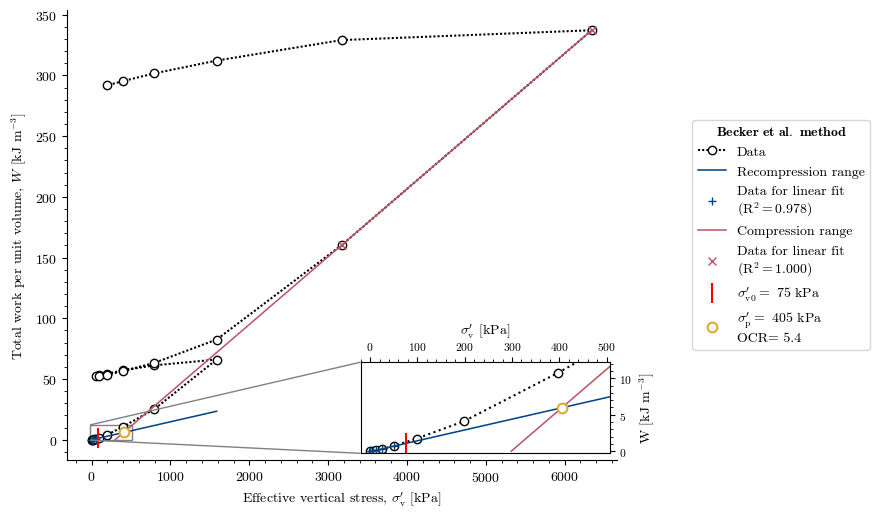

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/ipympl/backend_nbagg.py:279: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  self.manager.handle_json(content)


In [18]:
if file_number == 0:
    fig = m_becker.getSigmaP(range2fitRR=None, range2fitCR=None, zoom=6)
elif file_number == 1:
    fig = m_becker.getSigmaP(range2fitRR=[-np.inf, 30], range2fitCR=[70, 150], zoom=8)
elif file_number == 2:
    fig = m_becker.getSigmaP(range2fitRR=None, range2fitCR=[100, np.inf], zoom=1.1)
elif file_number == 3:
    fig = m_becker.getSigmaP(range2fitRR=None, range2fitCR=None, zoom=5)

display(fig)


### 6.2: Morin method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/ipympl/backend_nbagg.py:279: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  self.manager.handle_json(content)


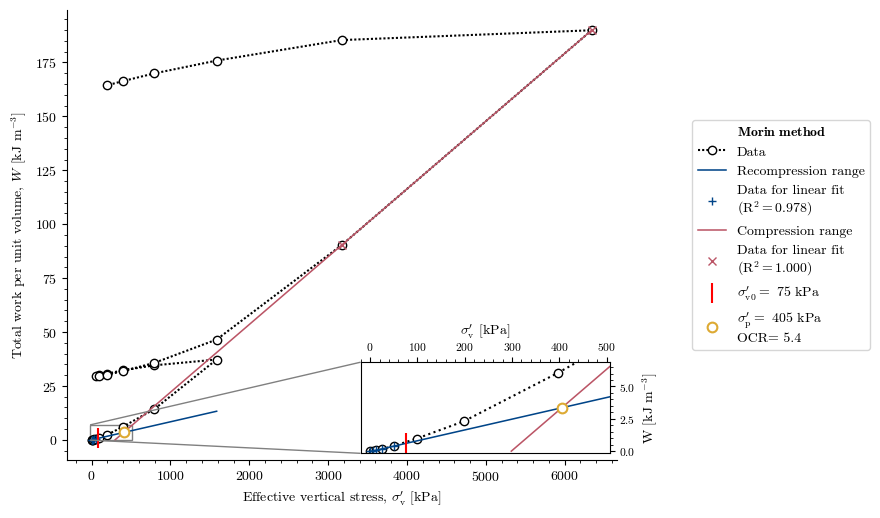

In [19]:
if file_number == 0:
    fig = m_becker.getSigmaP(morinFormulation=True, range2fitRR=None, range2fitCR=None, zoom=6)
elif file_number == 1:
    fig = m_becker.getSigmaP(morinFormulation=True, range2fitRR=[-np.inf, 30], range2fitCR=[70, 150], zoom=8)
elif file_number == 2:
    fig = m_becker.getSigmaP(morinFormulation=True, range2fitRR=None, range2fitCR=[100, np.inf], zoom=1.1)
elif file_number == 3:
    fig = m_becker.getSigmaP(morinFormulation=True, range2fitRR=None, range2fitCR=None, zoom=5)

display(fig)


### 6.3: Wang and Frost method

In [20]:
m_wang_n_frost = WangAndFrost(data)


/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


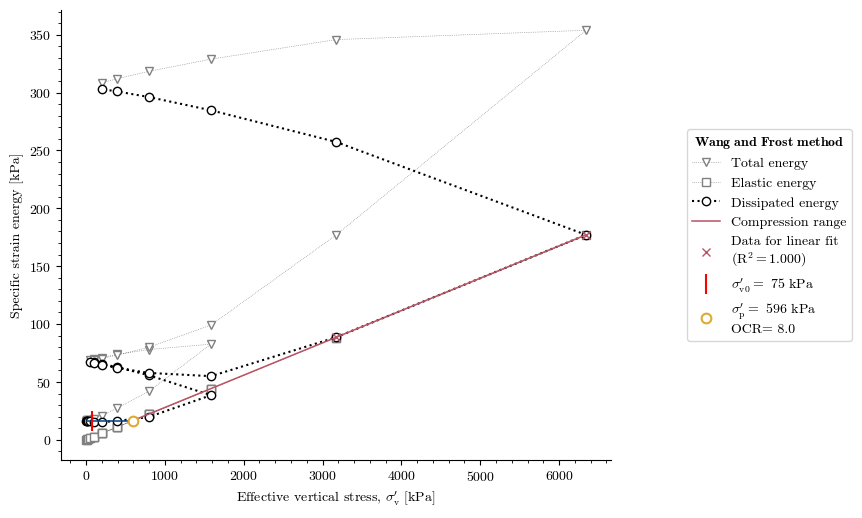

In [21]:
if file_number == 0:
    fig = m_wang_n_frost.getSigmaP(range2fitCR=None)
elif file_number == 1:
    fig = m_wang_n_frost.getSigmaP(range2fitCR=None)
elif file_number == 2:
    fig = m_wang_n_frost.getSigmaP(range2fitCR=[100, np.inf])
elif file_number == 3:
    fig = m_wang_n_frost.getSigmaP(range2fitCR=None)

display(fig)
